In [18]:
# import library
import os
import pandas as pd
import numpy as np
# import pylab as pl
# from pylab import rcParams
# rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,MetaData, Table,Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

import pymysql
pymysql.install_as_MySQLdb()

from config import dbuser, dbpasswd, dburi, dbport, dbname



In [19]:
# refelect table from MSQL workbench
engine = create_engine(f"mysql://{dbuser}:{dbpasswd}@{dburi}:{dbport}/{dbname}")
metaData = MetaData(engine)
metaData.reflect(engine)
Table('avocado_new', metaData,
                Column('id', Integer, primary_key=True),extend_existing=True
            )

Base = automap_base(metadata=metaData)
Base.prepare(engine, reflect=True)
Base.metadata.create_all(engine)

AvocadoPrice = Base.classes.avocado_new

session = Session(engine)
Base.metadata.create_all(engine)






In [39]:
#Query for table from table

price = session.query(AvocadoPrice.Date,AvocadoPrice.AveragePrice, AvocadoPrice.TotalVolume,AvocadoPrice.type,AvocadoPrice.year, AvocadoPrice.region).all()

In [40]:
#result of query
price

[('12/27/15',
  Decimal('1.3300000000'),
  Decimal('64236.6200000000'),
  'conventional',
  2015,
  'Albany'),
 ('12/20/15',
  Decimal('1.3500000000'),
  Decimal('54876.9800000000'),
  'conventional',
  2015,
  'Albany'),
 ('12/13/15',
  Decimal('0.9300000000'),
  Decimal('118220.2200000000'),
  'conventional',
  2015,
  'Albany'),
 ('12/6/15',
  Decimal('1.0800000000'),
  Decimal('78992.1500000000'),
  'conventional',
  2015,
  'Albany'),
 ('11/29/15',
  Decimal('1.2800000000'),
  Decimal('51039.6000000000'),
  'conventional',
  2015,
  'Albany'),
 ('11/22/15',
  Decimal('1.2600000000'),
  Decimal('55979.7800000000'),
  'conventional',
  2015,
  'Albany'),
 ('11/15/15',
  Decimal('0.9900000000'),
  Decimal('83453.7600000000'),
  'conventional',
  2015,
  'Albany'),
 ('11/8/15',
  Decimal('0.9800000000'),
  Decimal('109428.3300000000'),
  'conventional',
  2015,
  'Albany'),
 ('11/1/15',
  Decimal('1.0200000000'),
  Decimal('99811.4200000000'),
  'conventional',
  2015,
  'Albany'),
 (

In [43]:
#ELT

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(price, columns=['date','average_price', 'total_volumn','type','year','city'])
df.head()

,date,average_price,total_volumn,type,year,city
0,12/27/15,1.3300000000,64236.6200000000,conventional,2015,Albany
1,12/20/15,1.3500000000,54876.9800000000,conventional,2015,Albany
2,12/13/15,0.9300000000,118220.2200000000,conventional,2015,Albany
3,12/6/15,1.0800000000,78992.1500000000,conventional,2015,Albany
4,11/29/15,1.2800000000,51039.6000000000,conventional,2015,Albany


In [29]:
# Convert Column average price to float
df.average_price = df.average_price.astype(float)

In [51]:
# convert date to datetime type

df['date'] =  pd.to_datetime(df['date'], format='%d%b%Y:%H:%M:%S.%f')

In [52]:
#Summary

df.describe()


,year
count,9126.000000
mean,2016.147929
std,0.939968
min,2015.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


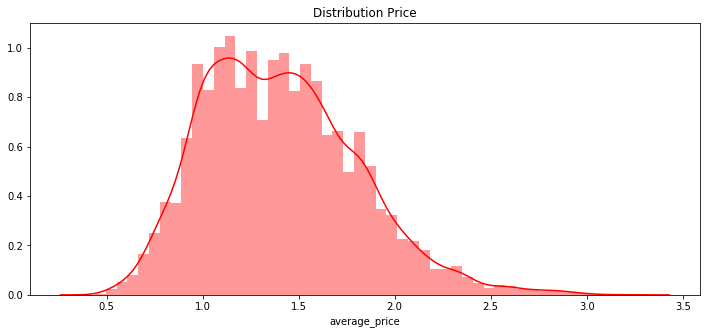

In [31]:
# price distribution of avocado
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(df["average_price"], color = 'r')

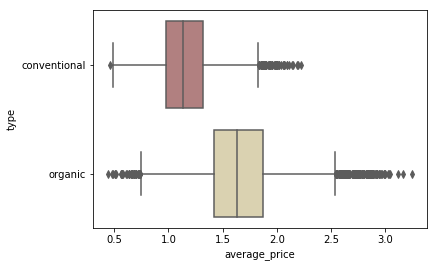

In [33]:
#price difference betweeen organic avocado and conventional avocado
sns.boxplot(y="type", x="average_price", data=df, palette = 'pink')

/Users/lilie/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lilie/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


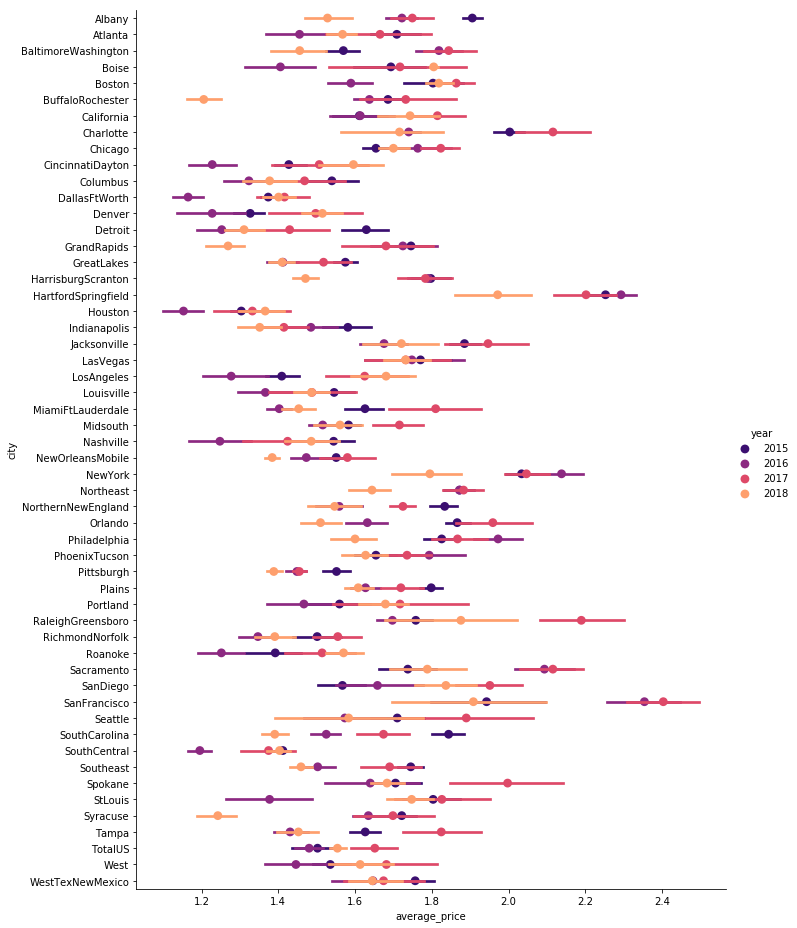

In [35]:
# price of organic avocado from different cities and years 
mask = df['type']=='organic'
g = sns.factorplot('average_price','city',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )


/Users/lilie/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/lilie/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


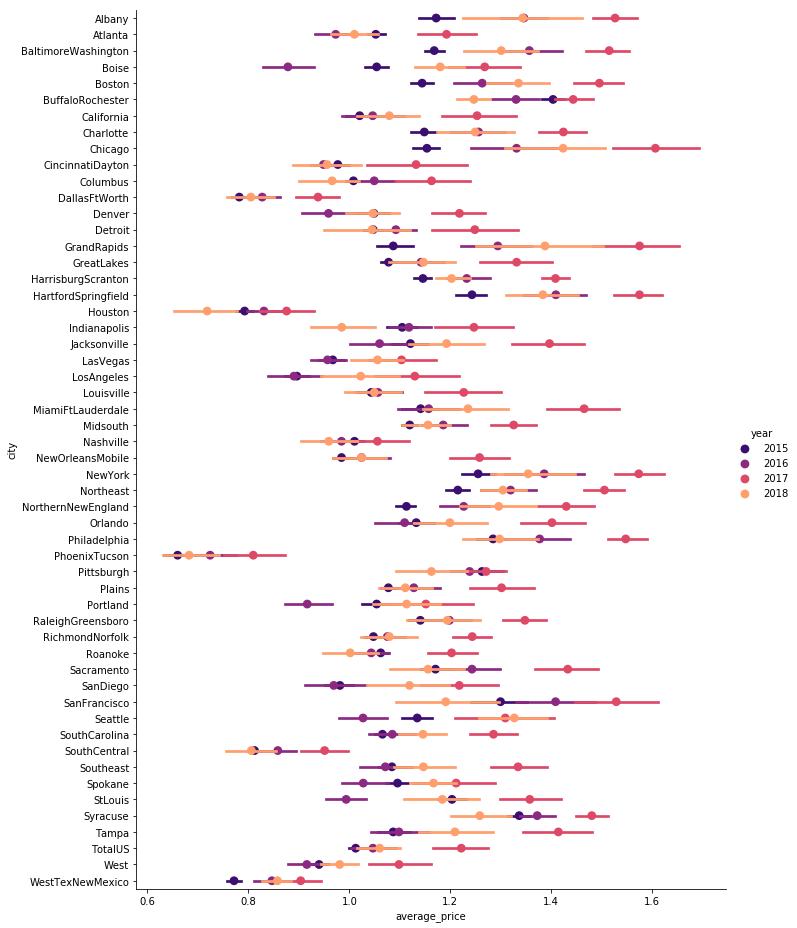

In [38]:
#price of conventional avocado by cities and years
mask = df['type']=='conventional'
g = sns.factorplot('average_price','city',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )





In [46]:
# Number of cities analysis for conentional avocados
PREDICTION_TYPE = 'conventional'
df = df[df.type == PREDICTION_TYPE]
df['date'] = pd.to_datetime(df['date'])
regions = df.groupby(df.city)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))






Total regions : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169
Syracuse  

In [49]:
# data frame for conventional avocados for total US

PREDICTING_FOR = "TotalUS"
date_price = regions.get_group(PREDICTING_FOR)[['date', 'average_price']].reset_index(drop=True)
date_price

,date,average_price
0,2015-12-27,0.9500000000
1,2015-12-20,0.9800000000
2,2015-12-13,0.9300000000
3,2015-12-06,0.8900000000
4,2015-11-29,0.9900000000
5,2015-11-22,0.9600000000
6,2015-11-15,0.9200000000
7,2015-11-08,0.9700000000
8,2015-11-01,0.9700000000
9,2015-10-25,1.0400000000


In [54]:

date_price.dtypes

date             datetime64[ns]
average_price            object
dtype: object

In [55]:
date_price['average_price'] = date_price['average_price'] .apply(pd.to_numeric, errors='coerce')

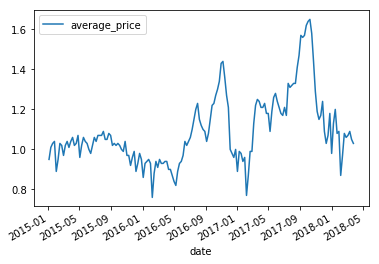

In [57]:
#Time series plot
date_price.plot(x='date', y='average_price', kind="line")

In [65]:
# Load of housing price data
house_data = pd.read_csv('house.csv')
house_data.head()

,city,State,HousePrice
0,Albany,N.Y.,"182,000"
1,Albuquerque,N.M.,"167,000"
2,Allentown,Pa.,"175,000"
3,Atlanta,Ga.,"210,000"
4,Augusta,Ga.,"155,000"


In [60]:
df

,date,average_price,total_volumn,type,year,city
0,2015-12-27,1.3300000000,64236.6200000000,conventional,2015,Albany
1,2015-12-20,1.3500000000,54876.9800000000,conventional,2015,Albany
2,2015-12-13,0.9300000000,118220.2200000000,conventional,2015,Albany
3,2015-12-06,1.0800000000,78992.1500000000,conventional,2015,Albany
4,2015-11-29,1.2800000000,51039.6000000000,conventional,2015,Albany
5,2015-11-22,1.2600000000,55979.7800000000,conventional,2015,Albany
6,2015-11-15,0.9900000000,83453.7600000000,conventional,2015,Albany
7,2015-11-08,0.9800000000,109428.3300000000,conventional,2015,Albany
8,2015-11-01,1.0200000000,99811.4200000000,conventional,2015,Albany
9,2015-10-25,1.0700000000,74338.7600000000,conventional,2015,Albany


In [66]:
 #Combine the data into a single dataset
    
df_complete = pd.merge(df, house_data, how="left", on=["city", "city"])

In [68]:
df_complete.head()

,date,average_price,total_volumn,type,year,city,State,HousePrice
0,2015-12-27,1.3300000000,64236.6200000000,conventional,2015,Albany,N.Y.,"182,000"
1,2015-12-20,1.3500000000,54876.9800000000,conventional,2015,Albany,N.Y.,"182,000"
2,2015-12-13,0.9300000000,118220.2200000000,conventional,2015,Albany,N.Y.,"182,000"
3,2015-12-06,1.0800000000,78992.1500000000,conventional,2015,Albany,N.Y.,"182,000"
4,2015-11-29,1.2800000000,51039.6000000000,conventional,2015,Albany,N.Y.,"182,000"


In [82]:
# Obtain the x and y coordinates for each of the avocado types
con = df_complete[df_complete["type"] == "conventional"]
org = df_complete[df_complete["type"] == "organic"]

In [83]:
con.head()


,date,average_price,total_volumn,type,year,city,State,HousePrice
0,2015-12-27,1.33,64236.6200000000,conventional,2015,Albany,N.Y.,182000.0
1,2015-12-20,1.35,54876.9800000000,conventional,2015,Albany,N.Y.,182000.0
2,2015-12-13,0.93,118220.2200000000,conventional,2015,Albany,N.Y.,182000.0
3,2015-12-06,1.08,78992.1500000000,conventional,2015,Albany,N.Y.,182000.0
4,2015-11-29,1.28,51039.6000000000,conventional,2015,Albany,N.Y.,182000.0


In [84]:
#Convert houseprice and average price to numeric type
df_complete['HousePrice'] = df_complete['HousePrice'].replace(",","", regex=True).astype(float)
df_complete['average_price'] = df_complete['average_price'] .apply(pd.to_numeric, errors='coerce')

In [86]:
#Calculate mean value of avocado price and house price by city
con_house = con.groupby(["city"]).mean()["HousePrice"]
con_avocado = con.groupby(["city"]).mean()["average_price"]
org_house = org.groupby(["city"]).mean()["HousePrice"]
org_avocado = org.groupby(["city"]).mean()["average_price"]

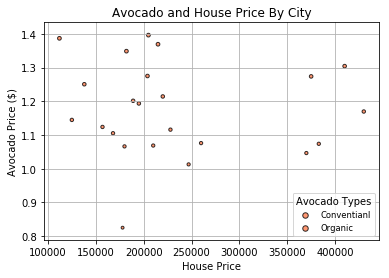

In [90]:
# Build the scatter plots for avocado types
pl.scatter(con_house, 
            con_avocado, 
            s=10*con_avocado, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Conventianl")

pl.scatter(org_house, 
            org_avocado, 
            s=10*org_avocado, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Organic")
# Incorporate the other graph properties
pl.title("Avocado and House Price By City")
pl.ylabel("Avocado Price ($)")
pl.xlabel("House Price")
pl.grid(True)

# Create a legend
lgnd = pl.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Avocado Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size

# Show plot
pl.show()




